d_triazole.csv

In [48]:
f = open('d_triazole.csv')   ################################ input file (드래곤 결과파일)
item = f.readline()
item = item.split()
print len(item)

2000


In [49]:
import pandas as pd
import numpy as np
csv_file =  pd.read_csv('d_triazole.csv',sep='\t') ####################### input file
csv_headr = list(csv_file.columns.values)
A = csv_file.isnull().any()
for fact in enumerate(A) :
    if fact[1] == True :
        col_Nan = csv_headr[fact[0]]
        del csv_file[col_Nan]
        
csv_file.to_csv("t_2.csv", sep=",") ######################## remove non
test_data=pd.read_csv('t_2.csv')  ####################### remove non

In [50]:
data_CN = (test_data-test_data.mean())/(test_data.max()-test_data.min())

In [51]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

data_NN=data_CN.ix[:,3:]   #id와 분자 이름 날리기 -> 디스크립터만 남기기 [:,3:]


name = list(data_NN.columns.values)


In [52]:
#triazole physico-chemical properties
Melting_point = ['X1A','GGI4','R2e','F03[N-N]']
Octanol_water_partition = ['nN','MATS1v','GATS3m','B08[C-C]']
Vapour_pressure = ['B09[N-Cl]','RBN','SpMin2_Bh(p)'] 
Aqueous_solubility = ['AMW','CIC0','MATS7e']

picdes = Aqueous_solubility

for u in picdes :
    if u in name :
        print u

AMW
CIC0
MATS7e


AMW : 0.236394227018
CIC0 : 0.328788000946
MATS7e : 21.9301092152


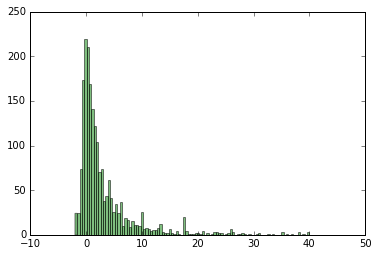

In [53]:
import scipy.stats.stats as st
aa =st.kurtosis(data_NN,axis=0)
ku = aa.tolist()
%matplotlib inline
#%matplotlib nbagg          
for i in picdes :
    aa = ""
    ae =st.kurtosis(data_NN[i].values,axis=0)
    aa = ""+i+" : "+str(ae)
    print('\x1b[1;46m'+aa+'\x1b[0m')
    

import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111) 
numBins = 100  #BAR의 갯수
ax.hist(ku,numBins,color='green',alpha=0.5) 
plt.show()

In [42]:
import scipy.stats.stats as st

def kurtosis (inf,value1,value2) :
    
    header = list(inf.columns.values)   # 디스크립터 항목만 빼내기

# print header
    col_kur= {}

    for i in header :
        col_kur[i] = [st.kurtosis(inf[i],axis=0)]

    a = 0 
    b = 0
    for i in col_kur :
        b = b+1
        if value2 < col_kur[i][0]:
            a = a +1 
            del inf[i]
        if value1 > col_kur[i][0]:
            a = a +1 
            del inf[i]
        


    return 'remain=',b-a

In [54]:
kurtosis(data_NN,0,22)

('remain=', 1490)

In [57]:
corre = data_NN.corr()

In [58]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import pandas
def set_cluster(nod) :
    assignments = fcluster(linkage(corre, method='complete'),nod,'distance')  # 숫자가 단계인듯..............?
    # print assignments
    cluster_output = pandas.DataFrame({'Descriptor':list(data_NN.columns.values) , 'cluster':assignments})
    nc = list(cluster_output.cluster.values)
    nnc = max(nc)
    vc = list(cluster_output.Descriptor.values)
    clu = {}
    for i in range(0,len(nc)):
        k = vc[i]
        v = nc[i]
        clu[k] = v
    
    for t in range(1,nnc+1):
        vv = []
        vv = [key for key, value in clu.iteritems() if value == t]    #Find Key by Value in Dictionary
        print '\n','\x1b[1;46m'+'Cluster'+'\x1b[0m',t,vv,
        for y in picdes :
            if y in vv :
                b = '\x1b[1;43m'+y+'\x1b[0m'
                print b

In [67]:
set_cluster(15)


Cluster 1 ['Gu', 'Gm', 'ChiA_D', 'ChiA_G', 'Vindex', 'VE2_B(v)', 'R2e+', 'HATS2e', 'HATS2u', 'WiA_B(m)', 'R4i+', 'Chi_G', 'SpMaxA_EA(bo)', 'VE2_Dt', 'VE2_B(e)', 'VE2_RG', 'G1i', 'WiA_B(s)', 'RTe+', 'VE2_D/Dt', 'WiA_G/D', 'TDB02m', 'TDB02v', 'TDB02p', 'R2u+', 'VE2_B(p)', 'HATS0e', 'HATS0u', 'R4e+', 'Mor21u', 'Mor21v', 'Mor21m', 'TDB03m', 'TDB03e', 'TDB03u', 'TDB03v', 'TDB03p', 'RTu+', 'HATS1u', 'Chi_Dz(p)', 'VE2_Dz(v)', 'SpMaxA_B(s)', 'R4u+', 'SpMaxA_AEA(dm)', 'ChiA_Dz(v)', 'Mor18u', 'Mor18i', 'Mor05i', 'Mor05m', 'SpMaxA_EA', 'VE2_B(s)', 'TDB01s', 'TDB01p', 'TDB01m', 'VE2_Dz(p)', 'CATS2D_01_DA', 'Mor05u', 'SHP2', 'N%', 'WiA_RG', 'Chi_D', 'VE2_X', 'Psi_i_1d', 'VE2_A', 'VE2_G', 'VE2_D', 'G1m', 'G1e', 'G1v', 'G1u', 'G1s', 'G1p', 'ChiA_H2', 'VE2_G/D', 'Yindex', 'R1u+', 'TDB04u', 'TDB04r', 'TDB04i', 'TDB04e', 'Xt', 'G3u', 'G3m', 'ChiA_Dt', 'VE2_B(m)', 'F01[N-N]', 'Xindex', 'Psi_i_t', 'R5u+', 'R5i+', 'SpMaxA_B(m)', 'HGM', 'LLS_01', 'Chi_D/Dt', 'Chi_Dz(e)', 'Chi_Dz(Z)', 'VE2_H2', 'Chi_Dz(v)',